#1. Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ls -al "/gdrive/My Drive/Colab Notebooks/자율주행_스터디/Chap3_머신러닝/data"

total 4080
-rw------- 1 root root 4177835 May 20 13:32 data_2020.csv


#2. Korean Characters

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,769 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
plt.rc('font', family='NanumBarunGothic')

#3. Load Data

In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
file = '/gdrive/My Drive/Colab Notebooks/자율주행_스터디/Chap3_머신러닝/data/data_2020.csv'
data = pd.read_csv(file)

In [ ]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [ ]:
# distance from Seoul: 0, 20, 77, 135, 185, 240, 215, 339, 407
data["도착영업소코드"]= data["도착영업소코드"].map({105:20, 110:77, 115:135, 120:185, 125:240, 130:215, 135:339, 140:407}) 

In [ ]:
data.rename(columns={"도착영업소코드":"거리"}, inplace=True)

In [ ]:
data.head()

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2


In [ ]:
data_desination = data[data["거리"].isin([407])]

In [ ]:
data_desination.head()

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
303,20200101,6,101,407,15824,2
304,20200101,6,101,407,19623,2
305,20200101,9,101,407,18048,2
306,20200101,17,101,407,17979,2
307,20200101,11,101,407,-1,2


In [ ]:
data_desination.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9764 entries, 303 to 157972
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   집계일자     9764 non-null   int64
 1   집계시      9764 non-null   int64
 2   출발영업소코드  9764 non-null   int64
 3   거리       9764 non-null   int64
 4   통행시간     9764 non-null   int64
 5   요일       9764 non-null   int64
dtypes: int64(6)
memory usage: 534.0 KB


In [ ]:
data_time = data_desination.groupby(["집계시", "요일", "거리"])["통행시간"].mean()

In [ ]:
data_time

집계시  요일  거리 
0    0   407    14383.375000
     1   407    14841.380952
     2   407    14074.116279
     3   407    12802.928571
     4   407    14461.977273
                    ...     
23   2   407    15615.707317
     3   407    14802.428571
     4   407    16707.826923
     5   407    14724.673469
     6   407    14631.891304
Name: 통행시간, Length: 168, dtype: float64

In [ ]:
data_distance = data_time.unstack(level=-1)

In [ ]:
data_distance

거리               407
집계시 요일              
0   0   14383.375000
    1   14841.380952
    2   14074.116279
    3   12802.928571
    4   14461.977273
...              ...
23  2   15615.707317
    3   14802.428571
    4   16707.826923
    5   14724.673469
    6   14631.891304

[168 rows x 1 columns]

In [ ]:
data_distance.dropna()

거리               407
집계시 요일              
0   0   14383.375000
    1   14841.380952
    2   14074.116279
    3   12802.928571
    4   14461.977273
...              ...
23  2   15615.707317
    3   14802.428571
    4   16707.826923
    5   14724.673469
    6   14631.891304

[168 rows x 1 columns]

In [ ]:
data_out = data_distance.reset_index()

In [ ]:
data_out

거리,집계시,요일,407
0,0,0,14383.375000
1,0,1,14841.380952
2,0,2,14074.116279
3,0,3,12802.928571
4,0,4,14461.977273
...,...,...,...
163,23,2,15615.707317
164,23,3,14802.428571
165,23,4,16707.826923
166,23,5,14724.673469


In [ ]:
# dataframe to list
data_list = data_out.values.tolist() 

In [ ]:
# train data set
x_train = [r[:2] for r in data_list]
y_train = [r[2] for r in data_list]

#4. Show Graph

In [ ]:
x_train[:5], y_train[:5]

([[0.0, 0.0], [0.0, 1.0], [0.0, 2.0], [0.0, 3.0], [0.0, 4.0]],
 [14383.375,
  14841.380952380952,
  14074.116279069767,
  12802.92857142857,
  14461.977272727272])

In [ ]:
x1 = [r[0] for r in data_list]
x2 = [r[1] for r in data_list]
y = [r[2] for r in data_list]

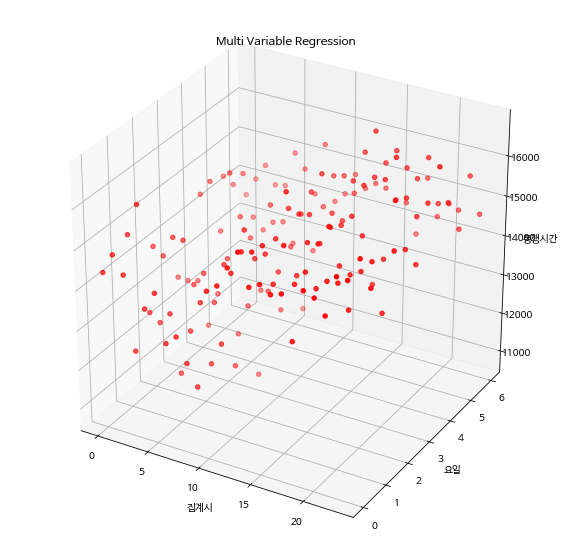

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_title("Multi Variable Regression")
ax.set_xlabel("집계시")
ax.set_ylabel("요일")
ax.set_zlabel("통행시간")
plot = ax.scatter3D(x1,x2,y,c='r')
plt.show()

#5. Multi Variable Using Tensorflow

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
learning_rate = 1e-6
learning_epochs = 2000

In [ ]:
# Stochastic Gradient Descent Optimizaer
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Mean Squared Error loss function
mse = tf.keras.losses.mean_squared_error

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(2,)))

model.compile(loss=mse, optimizer=sgd)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=learning_epochs)

Epoch 1/2000
6/6 [==============================] - 3s 2ms/step - loss: 211310784.0000
Epoch 2/2000
6/6 [==============================] - 0s 2ms/step - loss: 210537008.0000
Epoch 3/2000
6/6 [==============================] - 0s 2ms/step - loss: 209803696.0000
Epoch 4/2000
6/6 [==============================] - 0s 2ms/step - loss: 209085168.0000
Epoch 5/2000
6/6 [==============================] - 0s 2ms/step - loss: 208317056.0000
Epoch 6/2000
6/6 [==============================] - 0s 2ms/step - loss: 207598048.0000
Epoch 7/2000
6/6 [==============================] - 0s 2ms/step - loss: 206888032.0000
Epoch 8/2000
6/6 [==============================] - 0s 2ms/step - loss: 206163872.0000
Epoch 9/2000
6/6 [==============================] - 0s 2ms/step - loss: 205420864.0000
Epoch 10/2000
6/6 [==============================] - 0s 2ms/step - loss: 204699648.0000
Epoch 11/2000
6/6 [==============================] - 0s 2ms/step - loss: 203973120.0000
Epoch 12/2000
6/6 [======================

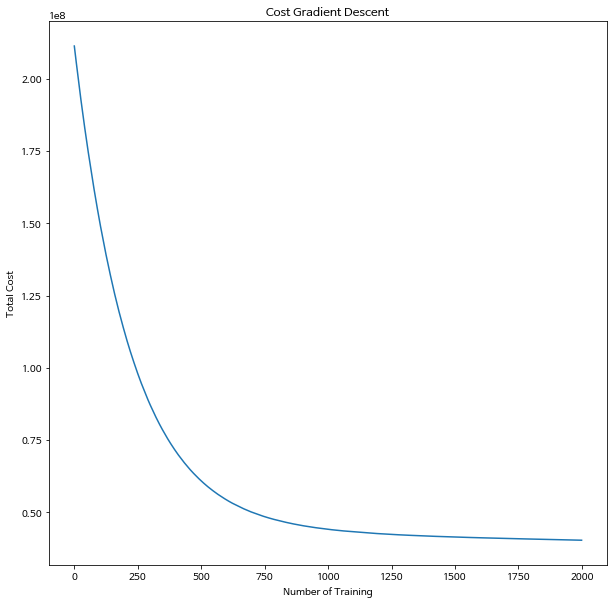

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.title("Cost Gradient Descent")
plt.ylabel("Total Cost")
plt.xlabel("Number of Training")
plt.show()

In [ ]:
print("%20s %20s " % ("Step", "Cost") + "\n")
for step in range(learning_epochs):
  if step%100 == 0:
    cost_val = history.history['loss'][step]
    print("%20i %20.5f" %(step, cost_val))

                Step                 Cost 

                   0      211310784.00000
                 100      150514080.00000
                 200      111707720.00000
                 300       86972584.00000
                 400       71095208.00000
                 500       60872004.00000
                 600       54288312.00000
                 700       50028000.00000
                 800       47251772.00000
                 900       45378436.00000
                1000       44123444.00000
                1100       43247196.00000
                1200       42612640.00000
                1300       42133936.00000
                1400       41758472.00000
                1500       41452676.00000
                1600       41193428.00000
                1700       40959576.00000
                1800       40745368.00000
                1900       40541696.00000


In [ ]:
time = 14 #@param {type:"slider", min:0, max:23, step:1}
day = 3 #@param {type:"slider", min:0, max:6, step:1}

In [ ]:
time_condition = data_out["집계시"]==time
day_condition = data_out["요일"]==day
data_out[time_condition & day_condition]

거리,집계시,요일,407
101,14,3,14671.333333


In [ ]:
input = [time, day]
p_time = model.predict([input])
ml_time = p_time[0][0]
week_days = ["월", "화", "수", "목", "금", "토", "일"]
print("%10s %10s %50s" %("집계시", "요일", "서울에서 부산까지 통행시간")+ "\n")
print("%10s %10s %50s" %(str(time), week_days[day], str(ml_time))+ "\n")

       집계시         요일                                     서울에서 부산까지 통행시간

        14          목                                          13424.843

